## Customer Segmentation
### K Means Clustering

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Import metrics module for performance evaluation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score


In [25]:
# Dsplay pipelines
from sklearn import set_config
set_config(display="diagram")

In [26]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [27]:
# Data Import
df = pd.read_csv('../../../data/mall-customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Data Visualization

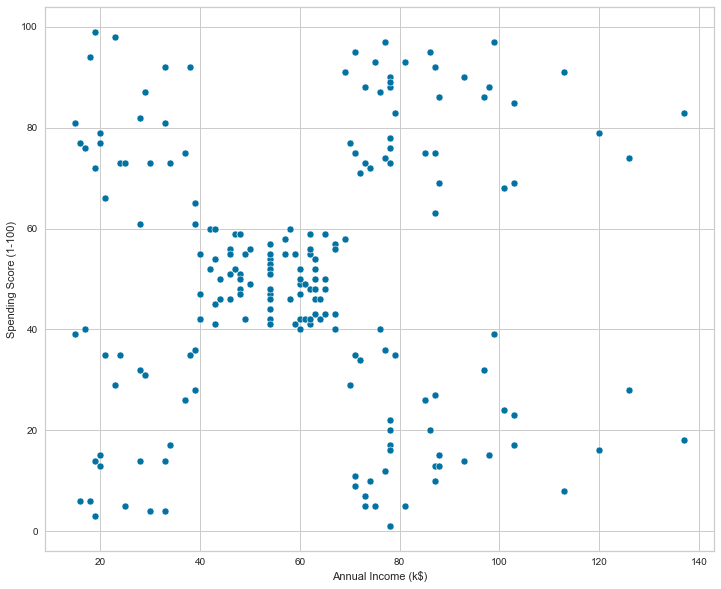

In [6]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=X, x='Annual Income (k$)',y='Spending Score (1-100)',palette=sns.color_palette("hls",10), legend="full")
plt.show()

## Find the number of clusters

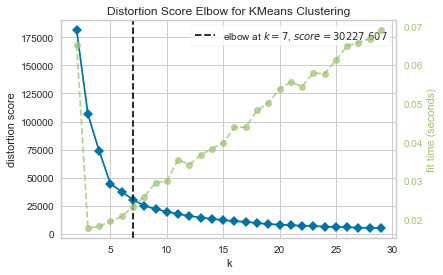

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Find the optimal number of clusters using the elbow method
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(X)
visualizer.show()


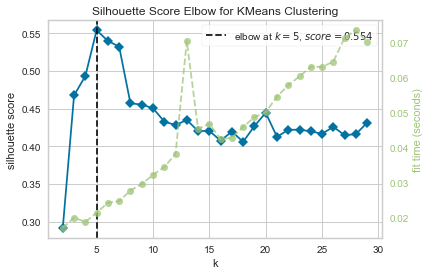

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:
# Find the optimum number of clusters using the silhouette score
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

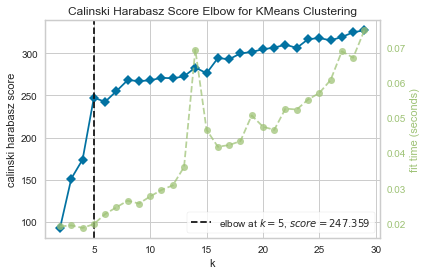

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
# Find the optimum number of clusters using the Calinski-Harabasz Index
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)
visualizer.show()

### From the above, The optimal number of clusters is 5.

In [10]:
# Define number of clusters
num_clusters = 5

## Create a clustering model using k-means clustering

In [11]:
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(X)

# Predict the target variable
y_pred=km.predict(X)

In [12]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [13]:
df['cluster'] = y_pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [14]:
# Plot the cluster


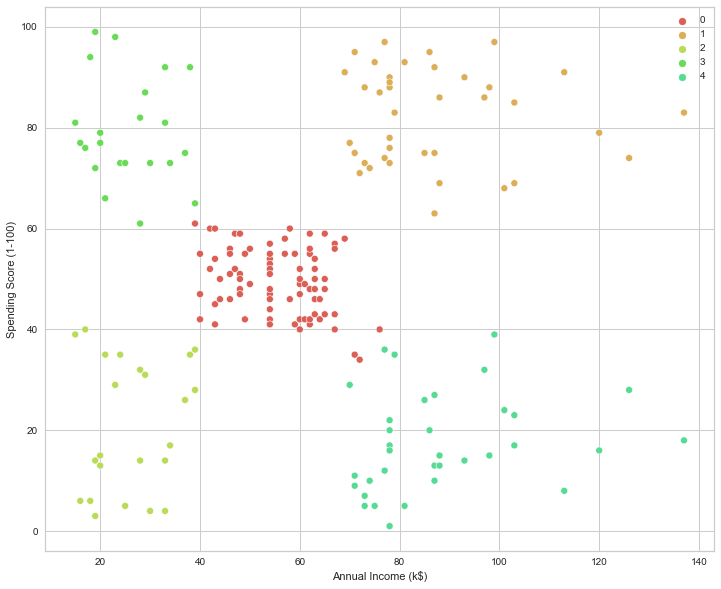

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=X, x='Annual Income (k$)',y='Spending Score (1-100)', hue=y_pred, palette=sns.color_palette("hls",10), legend="full")
plt.show()

In [16]:
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X, y_pred))
print("Silhouette Coefficient:", silhouette_score(X, y_pred))

Davies-Bouldin Index: 0.5725628995597086
Silhouette Coefficient: 0.553931997444648


In [22]:
# Calculate External performance evaluation measures
print("Adjusted Rand Score:", adjusted_rand_score(X, y_pred))
print("Jaccard Score:", jaccard_score(X, y_pred))
print("F-Measure(F1-Score):", f1_score(X, y_pred))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(X, y_pred))

ValueError: labels_true must be 1D: shape is (200, 2)